In [1]:
import pandas as pd,numpy as np,seaborn as sns
import matplotlib.pyplot as plt

In [2]:
df = pd.read_csv('/Users/yasjudanulislam/Downloads/Algerian_forest_fires_dataset_UPDATE.csv',header=1)

In [3]:
df.head(5)

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 246 entries, 0 to 245
Data columns (total 14 columns):
 #   Column       Non-Null Count  Dtype 
---  ------       --------------  ----- 
 0   day          246 non-null    object
 1   month        245 non-null    object
 2   year         245 non-null    object
 3   Temperature  245 non-null    object
 4    RH          245 non-null    object
 5    Ws          245 non-null    object
 6   Rain         245 non-null    object
 7   FFMC         245 non-null    object
 8   DMC          245 non-null    object
 9   DC           245 non-null    object
 10  ISI          245 non-null    object
 11  BUI          245 non-null    object
 12  FWI          245 non-null    object
 13  Classes      244 non-null    object
dtypes: object(14)
memory usage: 27.0+ KB


## Data cleaning

In [5]:
df.isnull().sum()

day            0
month          1
year           1
Temperature    1
 RH            1
 Ws            1
Rain           1
FFMC           1
DMC            1
DC             1
ISI            1
BUI            1
FWI            1
Classes        2
dtype: int64

In [6]:
df[df.isnull().any(axis=1)]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes
122,Sidi-Bel Abbes Region Dataset,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,14,07,2012,37,37,18,0.2,88.9,12.9,14.6 9,12.5,10.4,fire,NaN


In [7]:
df.loc[:122,'Region'] = 0
df.loc[122:,'Region'] = 1

In [8]:
## sid bel abes region -> 1

In [9]:
df['Region'] = df['Region'].astype(int)

In [10]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,01,06,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,02,06,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,03,06,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,04,06,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,05,06,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
241,26,09,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
242,27,09,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
243,28,09,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
244,29,09,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [11]:
df = df.dropna().reset_index(drop=True)

In [12]:
df.isna().sum()

day            0
month          0
year           0
Temperature    0
 RH            0
 Ws            0
Rain           0
FFMC           0
DMC            0
DC             0
ISI            0
BUI            0
FWI            0
Classes        0
Region         0
dtype: int64

In [13]:
df = df.drop(122).reset_index(drop = True)

In [14]:
df.iloc[[122]]

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
122,01,06,2012,32,71,12,0.7,57.1,2.5,8.2,0.6,2.8,0.2,not fire,1


In [15]:
df.columns = df.columns.str.strip()

In [16]:
df.columns

Index(['day', 'month', 'year', 'Temperature', 'RH', 'Ws', 'Rain', 'FFMC',
       'DMC', 'DC', 'ISI', 'BUI', 'FWI', 'Classes', 'Region'],
      dtype='object')

In [17]:
df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']] = df[['day', 'month', 'year', 'Temperature', 'RH', 'Ws']].astype(int)

In [18]:
df

,day,month,year,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,1,6,2012,29,57,18,0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,2,6,2012,29,61,13,1.3,64.4,4.1,7.6,1,3.9,0.4,not fire,0
2,3,6,2012,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,4,6,2012,25,89,13,2.5,28.6,1.3,6.9,0,1.7,0,not fire,0
4,5,6,2012,27,77,16,0,64.8,3,14.2,1.2,3.9,0.5,not fire,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
238,26,9,2012,30,65,14,0,85.4,16,44.5,4.5,16.9,6.5,fire,1
239,27,9,2012,28,87,15,4.4,41.1,6.5,8,0.1,6.2,0,not fire,1
240,28,9,2012,27,87,29,0.5,45.9,3.5,7.9,0.4,3.4,0.2,not fire,1
241,29,9,2012,24,54,18,0.1,79.7,4.3,15.2,1.7,5.1,0.7,not fire,1


In [19]:
ob = [feature for feature in df.columns if df[feature].dtypes=='O']

In [20]:
for i in ob:
    if i!= 'Classes':
        df[i] = df[i].astype(float)

In [21]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 243 entries, 0 to 242
Data columns (total 15 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   day          243 non-null    int64  
 1   month        243 non-null    int64  
 2   year         243 non-null    int64  
 3   Temperature  243 non-null    int64  
 4   RH           243 non-null    int64  
 5   Ws           243 non-null    int64  
 6   Rain         243 non-null    float64
 7   FFMC         243 non-null    float64
 8   DMC          243 non-null    float64
 9   DC           243 non-null    float64
 10  ISI          243 non-null    float64
 11  BUI          243 non-null    float64
 12  FWI          243 non-null    float64
 13  Classes      243 non-null    object 
 14  Region       243 non-null    int64  
dtypes: float64(7), int64(7), object(1)
memory usage: 28.6+ KB


In [22]:
df.to_csv('Algerian_Forest_Fire_cleaned.csv',index = False)

## Exploratory data analysis

In [23]:
df_copy = df.drop(['day','month','year'],axis=1)

In [24]:
df_copy.head()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,not fire,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,not fire,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0.1,not fire,0
3,25,89,13,2.5,28.6,1.3,6.9,0.0,1.7,0.0,not fire,0
4,27,77,16,0.0,64.8,3.0,14.2,1.2,3.9,0.5,not fire,0


In [25]:
df_copy['Classes'] = np.where(df_copy['Classes'].str.contains('not fire'),0,1)

In [26]:
df_copy.head(2)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0.5,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0.4,0,0


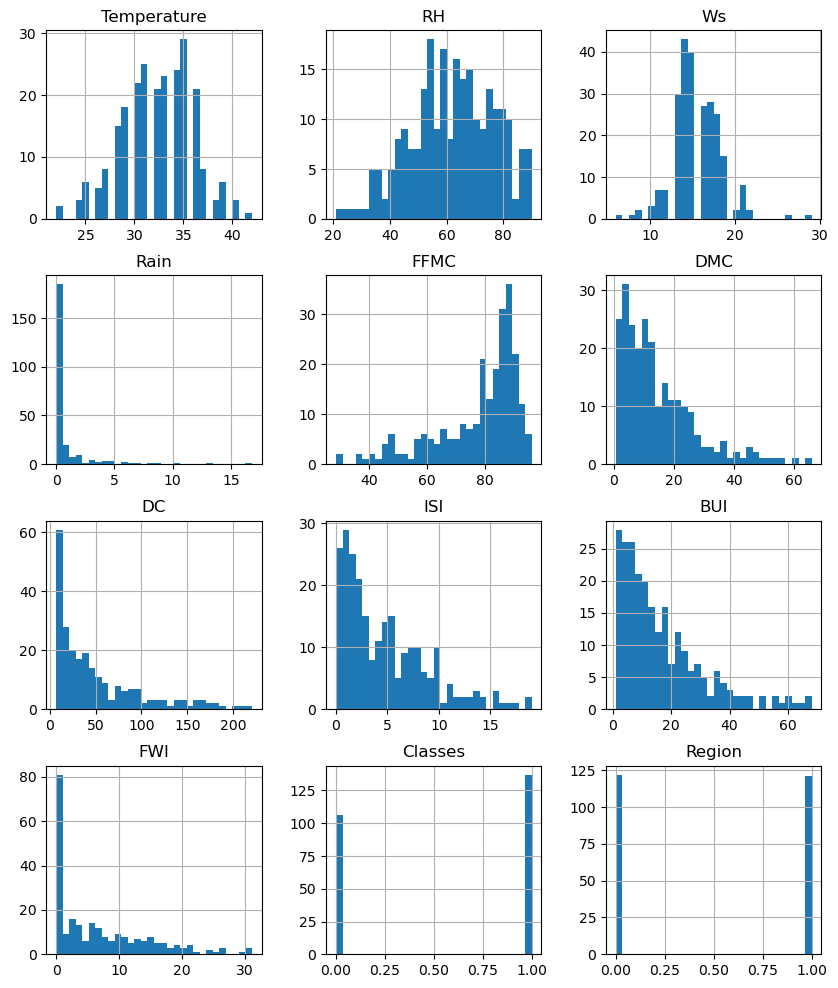

In [27]:
df_copy.hist(figsize=(10,12),bins=30)
plt.show()

In [28]:
percentage = df_copy['Classes'].value_counts(normalize=True)*100

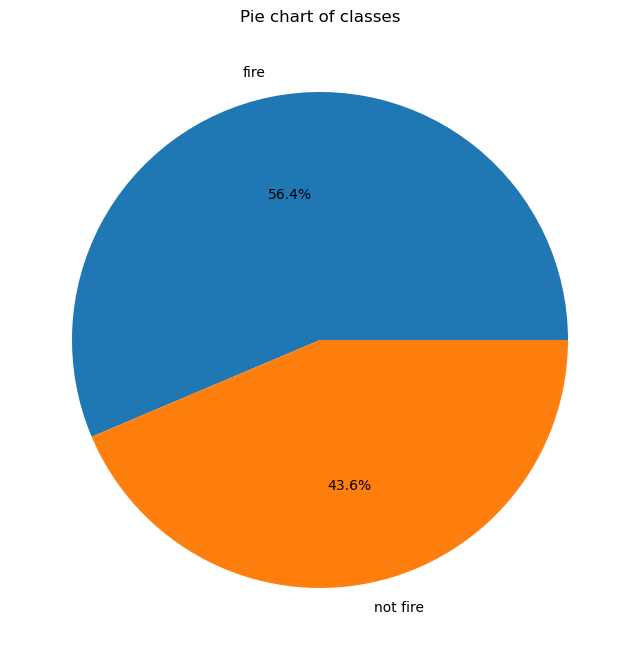

In [29]:
class_labels = ['fire','not fire']
plt.figure(figsize=(8,10))
plt.pie(percentage,labels=class_labels,autopct='%1.1f%%')
plt.title('Pie chart of classes')
plt.show()

In [30]:
df_copy.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,FWI,Classes,Region
Temperature,1.000000,-0.651400,-0.284510,-0.326492,0.676568,0.485687,0.376284,0.603871,0.459789,0.566670,0.516015,0.269555
RH,-0.651400,1.000000,0.244048,0.222356,-0.644873,-0.408519,-0.226941,-0.686667,-0.353841,-0.580957,-0.432161,-0.402682
Ws,-0.284510,0.244048,1.000000,0.171506,-0.166548,-0.000721,0.079135,0.008532,0.031438,0.032368,-0.069964,-0.181160
Rain,-0.326492,0.222356,0.171506,1.000000,-0.543906,-0.288773,-0.298023,-0.347484,-0.299852,-0.324422,-0.379097,-0.040013
FFMC,0.676568,-0.644873,-0.166548,-0.543906,1.000000,0.603608,0.507397,0.740007,0.592011,0.691132,0.769492,0.222241
DMC,0.485687,-0.408519,-0.000721,-0.288773,0.603608,1.000000,0.875925,0.680454,0.982248,0.875864,0.585658,0.192089
DC,0.376284,-0.226941,0.079135,-0.298023,0.507397,0.875925,1.000000,0.508643,0.941988,0.739521,0.511123,-0.078734
ISI,0.603871,-0.686667,0.008532,-0.347484,0.740007,0.680454,0.508643,1.000000,0.644093,0.922895,0.735197,0.263197
BUI,0.459789,-0.353841,0.031438,-0.299852,0.592011,0.982248,0.941988,0.644093,1.000000,0.857973,0.586639,0.089408
FWI,0.566670,-0.580957,0.032368,-0.324422,0.691132,0.875864,0.739521,0.922895,0.857973,1.000000,0.719216,0.197102


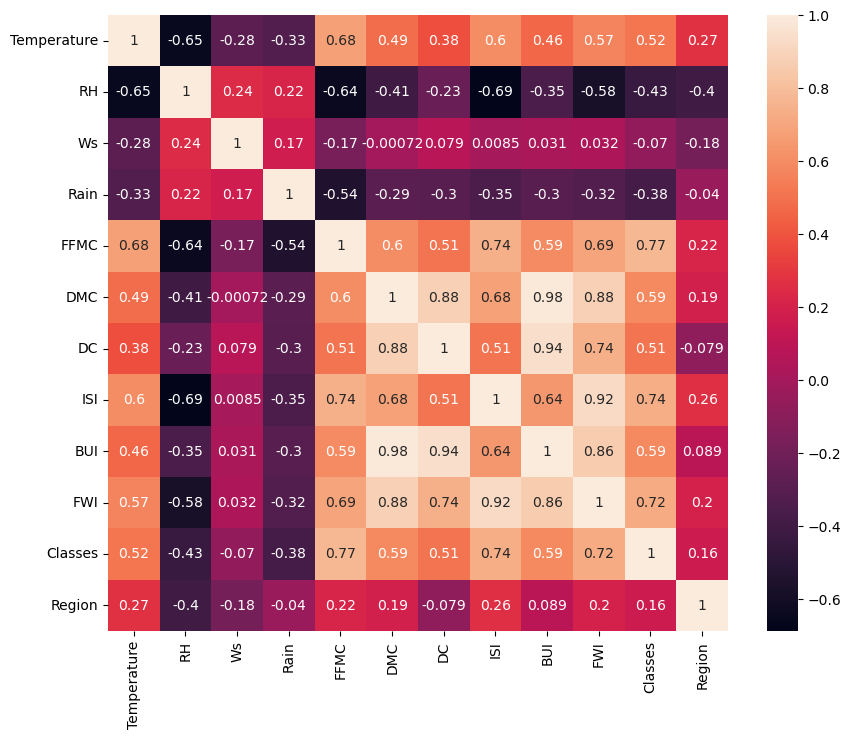

In [31]:
plt.figure(figsize=(10,8))
sns.heatmap(df_copy.corr(),annot=True)
plt.show()

In [32]:
df['Classes'] = np.where(df['Classes'].str.contains('not fire'),'not fire','fire')

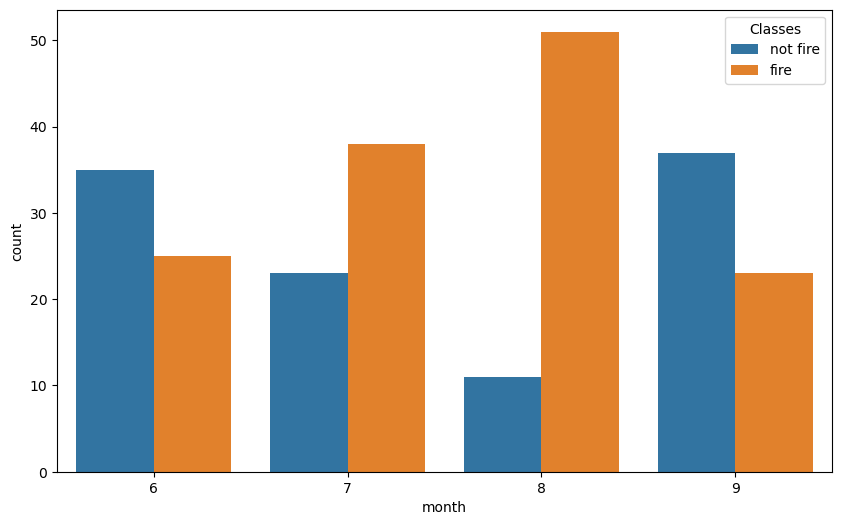

In [33]:
#Monthly fire analysis
dftemp = df.loc[df['Region']==1]
plt.subplots(figsize = (10,6))
sns.countplot(data=df,x='month',hue='Classes')
plt.show()

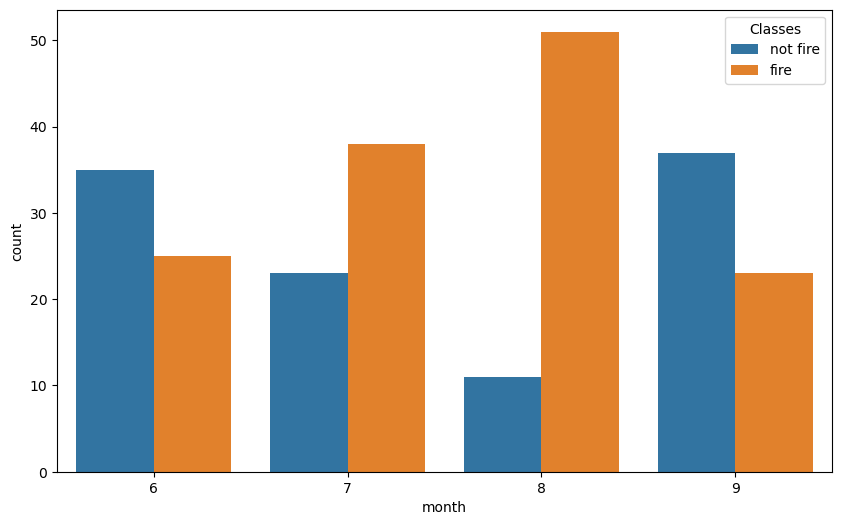

In [34]:
dftemp = df.loc[df['Region']==2]
plt.subplots(figsize = (10,6))
sns.countplot(data=df,x='month',hue='Classes')
plt.show()

## Feature selection

In [35]:
df_copy['Classes'].value_counts()

1    137
0    106
Name: Classes, dtype: int64

In [36]:
X = df_copy.drop('FWI',axis=1)
y = df_copy['FWI']

In [37]:
X.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
0,29,57,18,0.0,65.7,3.4,7.6,1.3,3.4,0,0
1,29,61,13,1.3,64.4,4.1,7.6,1.0,3.9,0,0
2,26,82,22,13.1,47.1,2.5,7.1,0.3,2.7,0,0


In [38]:
from sklearn.model_selection import train_test_split

In [39]:
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.25,random_state=42)

In [40]:
X_train.head(3)

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
97,29,74,19,0.1,75.8,3.6,32.2,2.1,5.6,0,0
141,31,72,14,0.2,60.2,3.8,8.0,0.8,3.7,0,1
192,40,31,15,0.0,94.2,22.5,46.3,16.6,22.4,1,1


In [41]:
#Feature selection based on correlation
X_train.corr()

,Temperature,RH,Ws,Rain,FFMC,DMC,DC,ISI,BUI,Classes,Region
Temperature,1.000000,-0.656095,-0.305977,-0.317512,0.694768,0.498173,0.390684,0.629848,0.473609,0.542141,0.254549
RH,-0.656095,1.000000,0.225736,0.241656,-0.653023,-0.414601,-0.236078,-0.717804,-0.362317,-0.456876,-0.394665
Ws,-0.305977,0.225736,1.000000,0.251932,-0.190076,0.000379,0.096576,-0.023558,0.035633,-0.082570,-0.199969
Rain,-0.317512,0.241656,0.251932,1.000000,-0.545491,-0.289754,-0.302341,-0.345707,-0.300964,-0.369357,-0.059022
FFMC,0.694768,-0.653023,-0.190076,-0.545491,1.000000,0.620807,0.524101,0.750799,0.607210,0.781259,0.249514
DMC,0.498173,-0.414601,0.000379,-0.289754,0.620807,1.000000,0.868647,0.685656,0.983175,0.617273,0.212582
DC,0.390684,-0.236078,0.096576,-0.302341,0.524101,0.868647,1.000000,0.513701,0.942414,0.543581,-0.060838
ISI,0.629848,-0.717804,-0.023558,-0.345707,0.750799,0.685656,0.513701,1.000000,0.643818,0.742977,0.296441
BUI,0.473609,-0.362317,0.035633,-0.300964,0.607210,0.983175,0.942414,0.643818,1.000000,0.612239,0.114897
Classes,0.542141,-0.456876,-0.082570,-0.369357,0.781259,0.617273,0.543581,0.742977,0.612239,1.000000,0.188837


<AxesSubplot:>

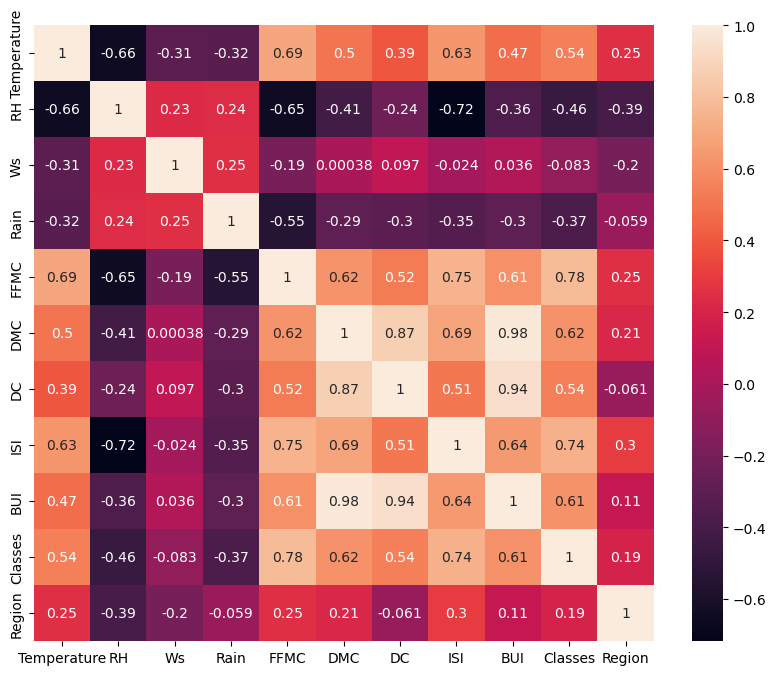

In [42]:
plt.figure(figsize=(10,8))
sns.heatmap(X_train.corr(),annot=True)


In [43]:
def correlation(dataset,threshold):
    col_corr = set()
    corr_matrix = dataset.corr()
    for i in range(len(corr_matrix.columns)):
        for j in range(i):
            if abs(corr_matrix.iloc[i,j]>threshold):
                   col_corr.add(corr_matrix.columns[i])
                   
    return col_corr

In [44]:
corr_features = correlation(X_train,0.85)

In [45]:
# dropping the features having correlation more than 0.85
X_train.drop(corr_features,axis=1,inplace = True)

In [46]:
X_test.drop(corr_features,axis=1,inplace = True)

## Feature scaling

In [47]:
from sklearn.preprocessing import StandardScaler

In [48]:
scaler = StandardScaler()

In [49]:
X_train_scaler = scaler.fit_transform(X_train)
X_test_scaler = scaler.fit_transform(X_test)

In [51]:
from sklearn.linear_model import LinearRegression

In [52]:
lr = LinearRegression()

In [53]:
lr.fit(X_train_scaler,y_train)

LinearRegression()

In [54]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

In [55]:
y_pred = lr.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ', mae)
print('R2 score: ', score)

MAE :  0.9939450225331407
R2 score:  0.960705665786065


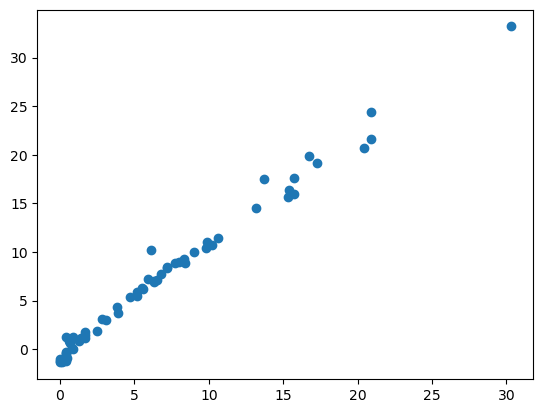

In [56]:
plt.scatter(y_test,y_pred)

## Lasso regression

In [57]:
from sklearn.linear_model import Lasso
lasso = Lasso()
lasso.fit(X_train_scaler,y_train)
y_pred = lasso.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ', mae)
print('R2 score : ',score)

MAE :  0.9605020166901077
R2 score :  0.9692970913627958


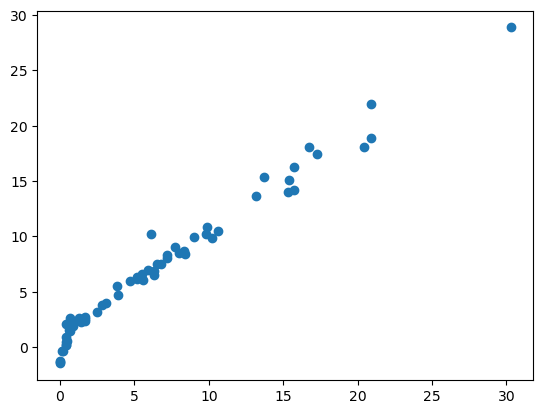

In [58]:
plt.scatter(y_test,y_pred)

MAE :  0.9630024676566876
R2 score :  0.9611112947220234


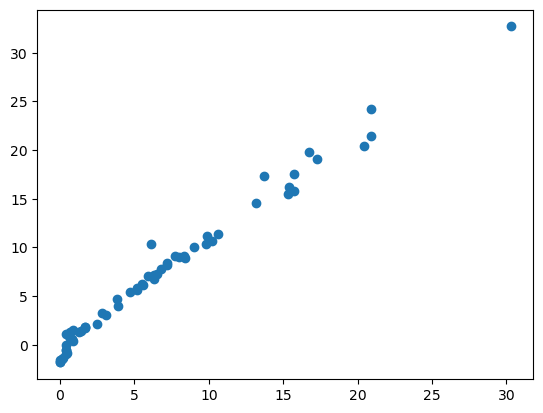

In [59]:
from sklearn.linear_model import LassoCV
lasso_cv = LassoCV(cv=5)
lasso_cv.fit(X_train_scaler, y_train)
y_pred = lasso_cv.predict(X_test_scaler)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
r2_score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print('R2 score : ',r2_score)

## Ridge regression

In [64]:
from sklearn.linear_model import Ridge
from sklearn.metrics import r2_score
ridge = Ridge()
ridge.fit(X_train_scaler,y_train)
y_pred = ridge.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ', mae)
print('R2 score : ',score)

MAE :  0.9862070802884386
R2 score :  0.9616458508455314


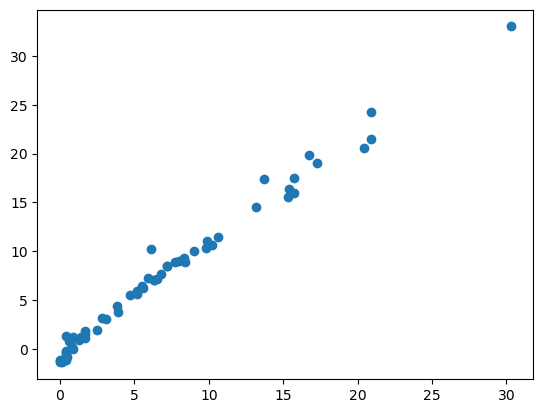

In [65]:
plt.scatter(y_test,y_pred)

MAE :  0.9862070802884386
R2 score :  0.9616458508455314


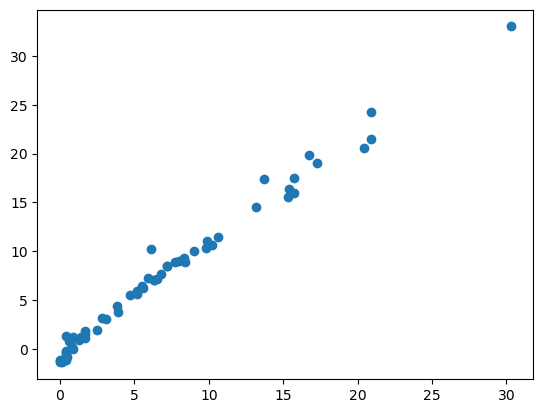

In [66]:
from sklearn.linear_model import RidgeCV
from sklearn.metrics import r2_score
ridge_cv = RidgeCV(cv=5)
ridge_cv.fit(X_train_scaler, y_train)
y_pred = ridge_cv.predict(X_test_scaler)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print('R2 score : ',score)

## Elastic Net

In [67]:
from sklearn.linear_model import ElasticNet
elasticNet = ElasticNet()
elasticNet.fit(X_train_scaler,y_train)
y_pred = elasticNet.predict(X_test_scaler)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ', mae)
print('R2 score : ',score)

MAE :  1.6511868133560939
R2 score :  0.9081701979826986


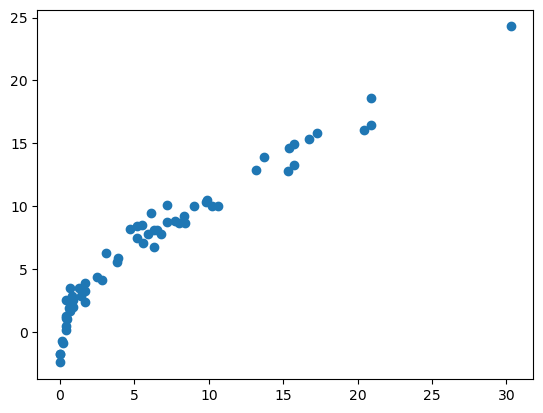

In [68]:
plt.scatter(y_test,y_pred)

MAE :  0.9658446127981587
R2 score :  0.9635664846226284


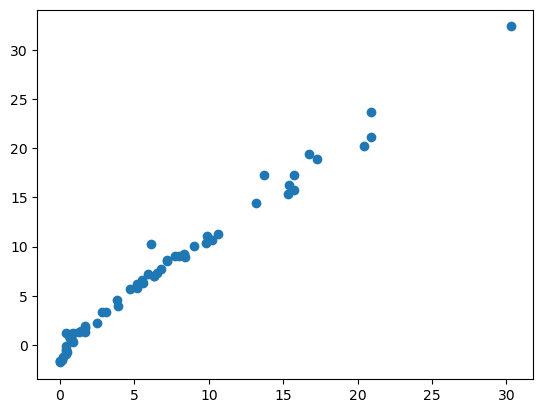

In [69]:
from sklearn.linear_model import ElasticNetCV
ElasticNet_cv = ElasticNetCV(cv=5)
ElasticNet_cv.fit(X_train_scaler, y_train)
y_pred = ElasticNet_cv.predict(X_test_scaler)
plt.scatter(y_test,y_pred)
mae = mean_absolute_error(y_test,y_pred)
score = r2_score(y_test,y_pred)
print('MAE : ',mae)
print('R2 score : ',score)